<a href="https://colab.research.google.com/github/Hsynyvz/Coursera/blob/main/Copy_of_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [ ]:
import tensorflow as tf
from scipy.io import loadmat

For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load the dataset from your Drive folder

train = loadmat("/content/gdrive/MyDrive/train_32x32.mat")

test = loadmat('/content/gdrive/MyDrive/test_32x32.mat')


Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.


**Street View House Numbers Classification**

The Street View House Numbers (SVHN) dataset is one of the most popular benchmarks for object recognition tasks in academic papers. The images were obtained from house numbers in Google Street View images, are hosted by Stanford University and are very similar in philosophy with the MNIST dataset. However, the original purpose of this dataset is to solve a harder problem: that of recognizing digits and numbers in natural scene images.

The data of the Street View House Numbers dataset, which can originally be found here are originally in .mat, i.e. files which can be best processed with MATLAB; thus, some preprocessing is required (see section 2). It is important to note that the data are divided into two formats and in this particular kernel we are going to use Format 2:

Format 1: The original, variable-resolution colored house-number images with character level bounding boxes.

Format 2: The cropped digits (32x32 pixels) which follow the philosophy of the MNIST dataset more closely, but also contain some distracting digits to the sides of the digit of interest.


In [ ]:
import numpy as np
import keras
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Conv2D , Dense ,Flatten ,BatchNormalization, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping ,ModelCheckpoint
%matplotlib inline

In [ ]:
np.random.seed(20)

In [ ]:
# Load images and labels

train_images = np.array(train['X'])
test_images = np.array(test['X'])

train_labels = train['y']
test_labels = test['y']


In [ ]:
# Check the shape of the data

print(train_images.shape)
print(test_images.shape)

(32, 32, 3, 73257)
(32, 32, 3, 26032)


In [ ]:
# Fix the axes of the images

train_images = np.moveaxis(train_images, -1, 0)
test_images = np.moveaxis(test_images, -1, 0)

print(train_images.shape)
print(test_images.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)


In [ ]:
test_images[0].shape

(32, 32, 3)

In [ ]:
# Convert train and test images into 'float64' type

train_images = train_images.astype('float64')
test_images = test_images.astype('float64')


In [ ]:
# Convert train and test labels into 'int64' type

train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')

In [ ]:
print('Min: {}, Max: {}'.format(train_images.min(), train_images.max()))

train_images /= 255.0
test_images /= 255.0

Min: 0.0, Max: 255.0


In [ ]:
train_images_gray = np.mean(train_images[1], axis=2)


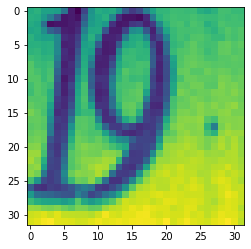

In [ ]:
plt.imshow(train_images_gray)

plt.show()

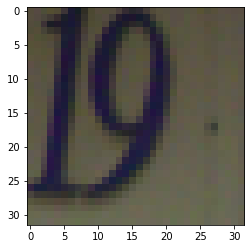

Label: 1


In [ ]:
plt.imshow(train_images[1])

plt.show()
print(f"Label: {train_labels[i][0]}")
plt.show()

Label: 2
Label: 6
Label: 10
Label: 5
Label: 6
Label: 4
Label: 1
Label: 5
Label: 9
Label: 6


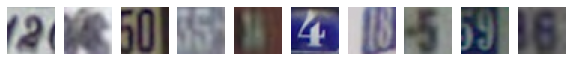

In [ ]:
# Normalize the images data
fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    random_inx = np.random.randint(1000)
    ax[i].set_axis_off()
    ax[i].imshow(train_images[random_inx])
    print(f"Label: {train_labels[random_inx][0]}")

In [ ]:
# One-hot encoding of train and test labels

lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [ ]:
# Split train data into train and validation sets

#X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels,test_size=0.15, random_state=22)


In [ ]:
#y_val.shape

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
train_images[1].shape


(32, 32, 3)

In [ ]:
def get_mlp_model():

    MLPmodel = Sequential([ Flatten(input_shape = (32,32, 3)),
                         Dense(128, activation="relu"),
                         Dense(64, activation="relu"),
                        
                         Dense(64, activation="relu"),
                         
                         Dense(16, activation="relu"),
                         
                         Flatten(),
                         Dense(10, activation="softmax")
                         ])
    MLPmodel.compile(optimizer="adam",loss="categorical_crossentropy", metrics=["accuracy"])
    return MLPmodel

In [ ]:
early_stopping = EarlyStopping(monitor = "val_accuracy",patience=5 )
checkpoint = ModelCheckpoint(filepath="checkpoint1",
                            save_weights_only = True, 
                             
                             save_freq="epoch",
                             save_best_only = True  )

In [ ]:
MLPmodel = get_mlp_model()

In [ ]:
history = MLPmodel.fit(train_images,train_labels ,epochs=60, validation_split=0.15 , batch_size=256 , callbacks=[early_stopping,checkpoint] ,verbose = 2)

Epoch 1/60
244/244 - 2s - loss: 2.2397 - accuracy: 0.1896 - val_loss: 2.1139 - val_accuracy: 0.2532
Epoch 2/60
244/244 - 1s - loss: 1.8673 - accuracy: 0.3352 - val_loss: 1.6783 - val_accuracy: 0.4094
Epoch 3/60
244/244 - 1s - loss: 1.5424 - accuracy: 0.4679 - val_loss: 1.5221 - val_accuracy: 0.4867
Epoch 4/60
244/244 - 1s - loss: 1.3592 - accuracy: 0.5546 - val_loss: 1.2505 - val_accuracy: 0.6018
Epoch 5/60
244/244 - 1s - loss: 1.2034 - accuracy: 0.6166 - val_loss: 1.1538 - val_accuracy: 0.6357
Epoch 6/60
244/244 - 1s - loss: 1.1318 - accuracy: 0.6445 - val_loss: 1.1165 - val_accuracy: 0.6457
Epoch 7/60
244/244 - 1s - loss: 1.0659 - accuracy: 0.6679 - val_loss: 1.0576 - val_accuracy: 0.6718
Epoch 8/60
244/244 - 1s - loss: 1.0285 - accuracy: 0.6804 - val_loss: 1.0359 - val_accuracy: 0.6737
Epoch 9/60
244/244 - 1s - loss: 1.0007 - accuracy: 0.6901 - val_loss: 1.0461 - val_accuracy: 0.6681
Epoch 10/60
244/244 - 1s - loss: 0.9621 - accuracy: 0.7034 - val_loss: 0.9989 - val_accuracy: 0.6870

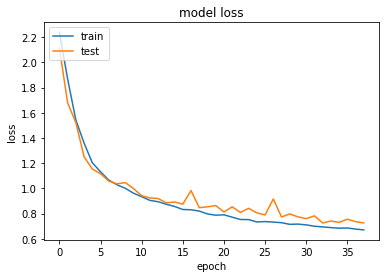

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

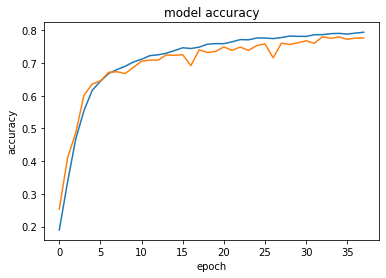

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

In [ ]:
MLPmodel.evaluate(test_images, test_labels, verbose=False)

[0.8576376438140869, 0.7515749931335449]

In [ ]:
MLPmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                1040      
_________________________________________________________________
flatten_6 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
def get_cnnmodel():

    cnnmodel = Sequential([Conv2D(32 ,3, input_shape = train_images[0].shape , activation="relu"),
                           Dropout(0.5),
                           Conv2D(64,3, activation="relu"),
                           Dropout(0.5),
                           Conv2D(128,3, activation="relu"),
                           Conv2D(256,3, activation="relu"),
                           Dropout(0.5),
                           Flatten(),
                           Dense(128, activation = "relu"),
                           Dropout(0.5),
                           Flatten(),
                           Dense(10, activation="softmax")
                       ])
    cnnmodel.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
    return cnnmodel

In [ ]:
cnnmodel = get_cnnmodel()

In [ ]:
cnnmodel.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_18 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
dropout_19 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 26, 26, 128)       73856     
_________________________________________________________________
dropout_20 (Dropout)         (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 86528)           

In [ ]:
cnnmodel.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
early_stopping = EarlyStopping(monitor = "val_accuracy",patience=10 )
checkpoint2 = ModelCheckpoint(filepath="checkpoint2",
                             save_freq="epoch",
                             save_best_only = True )

In [ ]:
history = cnnmodel.fit(train_images,train_labels ,epochs=60, validation_split=0.15 , batch_size=512, callbacks=[checkpoint2], verbose =1)

Epoch 1/60
122/122 [==============================] - 23s 186ms/step - loss: 2.6027 - accuracy: 0.1568 - val_loss: 2.2373 - val_accuracy: 0.1881
INFO:tensorflow:Assets written to: checkpoint2/assets
Epoch 2/60
122/122 [==============================] - 23s 186ms/step - loss: 2.2425 - accuracy: 0.1859 - val_loss: 2.0464 - val_accuracy: 0.2940
INFO:tensorflow:Assets written to: checkpoint2/assets
Epoch 3/60
122/122 [==============================] - 22s 182ms/step - loss: 1.8791 - accuracy: 0.3455 - val_loss: 1.0227 - val_accuracy: 0.6974
INFO:tensorflow:Assets written to: checkpoint2/assets
Epoch 4/60
122/122 [==============================] - 22s 182ms/step - loss: 1.2150 - accuracy: 0.6120 - val_loss: 0.8813 - val_accuracy: 0.7231
INFO:tensorflow:Assets written to: checkpoint2/assets
Epoch 5/60
122/122 [==============================] - 22s 183ms/step - loss: 1.0738 - accuracy: 0.6565 - val_loss: 0.7581 - val_accuracy: 0.7672
INFO:tensorflow:Assets written to: checkpoint2/assets
Epoch

In [ ]:
cnnmodel.evaluate(test_images, test_labels, verbose=False)

[0.4026384949684143, 0.9102643132209778]

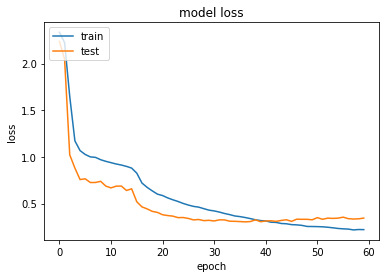

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

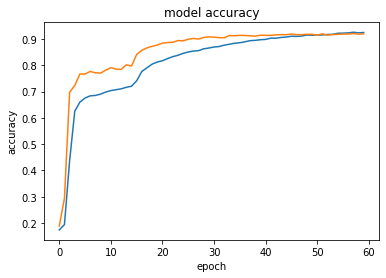

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [ ]:
mlpmodel = get_mlp_model()
mlpmodel.load_weights("checkpoint1")
mlpmodel.evaluate(test_images, test_labels, verbose=2)

814/814 - 2s - loss: 0.8613 - accuracy: 0.7491


[0.8612536787986755, 0.7491164803504944]

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
cnnmodel = load_model("checkpoint2")

cnnmodel.evaluate(test_images, test_labels, verbose=2)

814/814 - 3s - loss: 0.3454 - accuracy: 0.9051


[0.34537473320961, 0.9050783514976501]

Label: [0 0 0 0 0 0 1 0 0 0]
Label: [0 0 1 0 0 0 0 0 0 0]
Label: [1 0 0 0 0 0 0 0 0 0]
Label: [1 0 0 0 0 0 0 0 0 0]
Label: [0 0 0 0 0 0 0 0 1 0]
Label: [0 0 0 0 0 1 0 0 0 0]
Label: [0 1 0 0 0 0 0 0 0 0]
Label: [0 0 1 0 0 0 0 0 0 0]
Label: [0 1 0 0 0 0 0 0 0 0]
Label: [0 0 0 0 0 0 0 0 1 0]


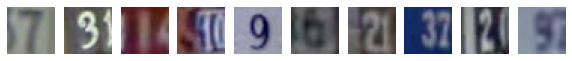

In [ ]:
fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    random_inx = np.random.randint(1000)
    ax[i].set_axis_off()
    ax[i].imshow(test_images[random_inx])
    print(f"Label: {test_labels[random_inx]}")